In [1]:
import numpy as np
from numpy import load
import matplotlib.pyplot as plt
from keras.models import *
from keras.layers import *
from keras.optimizers import *

Using TensorFlow backend.


# Preview Testing File

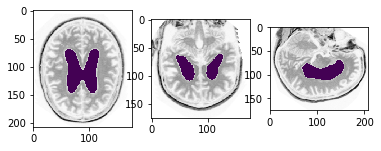

In [13]:
dict_data = np.load('OAS1_0098_MR.npz')
data = dict_data['arr_0']
dict_data = np.load('OAS1_0098_MRseg.npz')
data2 = dict_data['arr_0']


f, ax = plt.subplots(1,3)

ax[0].imshow(data[100,:,:],cmap="Greys")
ax[0].imshow(np.ma.masked_array(data2[100,:,:], data2[100,:,:]==0.0))

ax[1].imshow(data[:,80,:],cmap="Greys")
ax[1].imshow(np.ma.masked_array(data2[:,80,:], data2[:,80,:]==0.0))

ax[2].imshow(data[:,:,70],cmap="Greys")
ax[2].imshow(np.ma.masked_array(data2[:,:,70], data2[:,:,70]==0.0))

# Import Files and Models

In [15]:
# # 80 x 120 x 120
# # Load Your model here

# model = load_model('model_040-0.0279.h5')
# X_testing= np.load('OAS1_0084_MR.npz')['arr_0'][42:122,41:161,24:144]
# X_testing= np.flip(X_testing, axis=2)
# Y_testing= np.load('OAS1_0084_MRseg.npz')['arr_0'][42:122,41:161,24:144]
# Y_testing= np.flip(Y_testing, axis=2)

# X_testing = X_testing.reshape(1,80,120,120,-1)

# print(X_testing.shape)
# print(Y_testing.shape)

# y_predict = np.around(model.predict(X_testing))
# y_predict = y_predict.reshape(-1,80,120,120)

#------------------------------------------------------------------------------------
# 88 x 104 x 88
# Access The first training model 
model = load_model('First_Model.h5')
X_testing= np.load('OAS1_0098_MR.npz')['arr_0'][44:132,52:156,44:132]
Y_testing= np.load('OAS1_0098_MRseg.npz')['arr_0'][44:132,52:156,44:132]

X_testing = X_testing.reshape(1,88,104,88,-1)

print(X_testing.shape)
print(Y_testing.shape)

y_predict = np.around(model.predict(X_testing))
y_predict = y_predict.reshape(-1,88,104,88)

(1, 88, 104, 88, 1)
(88, 104, 88)


# Accuracy Test

In [16]:
PJ = y_predict.reshape(-1)
AJ = Y_testing.reshape(-1)

count = 0
for i in range(PJ.shape[0]):
    if PJ[i] == AJ[i]:
        if PJ[i]==1:
            count += 1
    
total = np.count_nonzero(AJ)
 
print("Predicted number of segment pixel: ", count)
print("Actual number of segment pixel: ", np.count_nonzero(Y_testing))     
print("Predicted Accuracy :", count/total)

Predicted number of segment pixel:  99687
Actual number of segment pixel:  112089
Predicted Accuracy : 0.8893557797821374


# Predicted Visualization

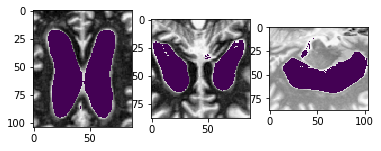

In [17]:
f, ax = plt.subplots(1,3)

#------------------------------------------------------------------------------------
# 80 x 120 x 120
X_plot = X_testing.reshape(80,120,120)
y_plot = y_predict.reshape(80,120,120)

# Formula x-axis: Actual Pixel Loc - 42 = Trunc. Pixel Loc
ax[0].imshow(X_plot[58,:,:],cmap="Greys")
ax[0].imshow(np.ma.masked_array(y_plot[58,:,:], y_plot[58,:,:]==0.0))

# Formula y-axis: Actual Pixel Loc - 41 = Trunc. Pixel Loc
ax[1].imshow(X_plot[:,39,:],cmap="Greys")
ax[1].imshow(np.ma.masked_array(y_plot[:,39,:], y_plot[:,39,:]==0.0))

# Formula z-axis: Actual Pixel Loc - 24 = Trunc. Pixel Loc
ax[2].imshow(X_plot[:,:,46],cmap="Greys")
ax[2].imshow(np.ma.masked_array(y_plot[:,:,46], y_plot[:,:,46]==0.0))


#------------------------------------------------------------------------------------
# 88 x 104 x 88
# X_plot = X_testing.reshape(88,104,88)
# y_plot = y_predict.reshape(88,104,88)

# # Formula x-axis: Actual Pixel Loc - 44 = Trunc. Pixel Loc
# ax[0].imshow(X_plot[56,:,:],cmap="Greys")
# ax[0].imshow(np.ma.masked_array(y_plot[56,:,:], y_plot[56,:,:]==0.0))

# # Formula y-axis: Actual Pixel Loc - 52 = Trunc. Pixel Loc
# ax[1].imshow(X_plot[:,28,:],cmap="Greys")
# ax[1].imshow(np.ma.masked_array(y_plot[:,28,:], y_plot[:,28,:]==0.0))

# # Formula z-axis: Actual Pixel Loc - 44 = Trunc. Pixel Loc
# ax[2].imshow(X_plot[:,:,26],cmap="Greys")
# ax[2].imshow(np.ma.masked_array(y_plot[:,:,26], y_plot[:,:,26]==0.0))



# Actual Visualization

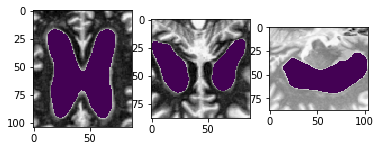

In [18]:
f, ax = plt.subplots(1,3)

#------------------------------------------------------------------------------------
# 80 x 120 x 120

# Formula x-axis: Actual Pixel Loc - 42 = Trunc. Pixel Loc
ax[0].imshow(X_plot[58,:,:],cmap="Greys")
ax[0].imshow(np.ma.masked_array(Y_testing[58,:,:], Y_testing[58,:,:]==0.0))

# Formula y-axis: Actual Pixel Loc - 41 = Trunc. Pixel Loc
ax[1].imshow(X_plot[:,39,:],cmap="Greys")
ax[1].imshow(np.ma.masked_array(Y_testing[:,39,:],Y_testing[:,39,:]==0.0))

# Formula z-axis: Actual Pixel Loc - 24 = Trunc. Pixel Loc
ax[2].imshow(X_plot[:,:,46],cmap="Greys")
ax[2].imshow(np.ma.masked_array(Y_testing[:,:,46], Y_testing[:,:,46]==0.0))

#-----------------------------------------------------------------------------------
# 88 x 104 x 88

# # Formula x-axis: Actual Pixel Loc - 44 = Trunc. Pixel Loc
# ax[0].imshow(X_plot[56,:,:],cmap="Greys")
# ax[0].imshow(np.ma.masked_array(Y_testing[56,:,:], Y_testing[56,:,:]==0.0))

# # Formula y-axis: Actual Pixel Loc - 52 = Trunc. Pixel Loc
# ax[1].imshow(X_plot[:,28,:],cmap="Greys")
# ax[1].imshow(np.ma.masked_array(Y_testing[:,28,:], Y_testing[:,28,:]==0.0))

# # Formula z-axis: Actual Pixel Loc - 44 = Trunc. Pixel Loc
# ax[2].imshow(X_plot[:,:,26],cmap="Greys")
# ax[2].imshow(np.ma.masked_array(Y_testing[:,:,26], Y_testing[:,:,26]==0.0))